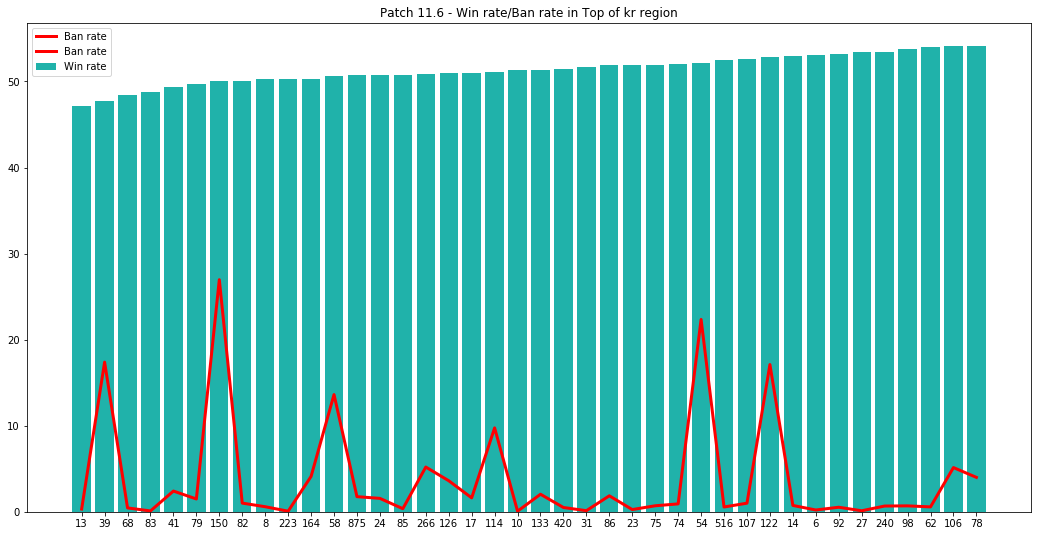

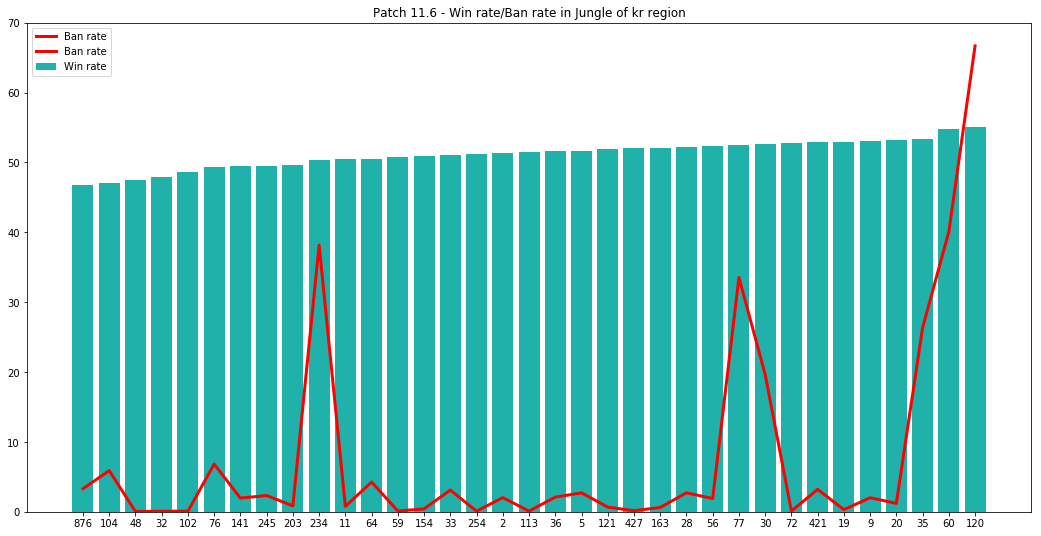

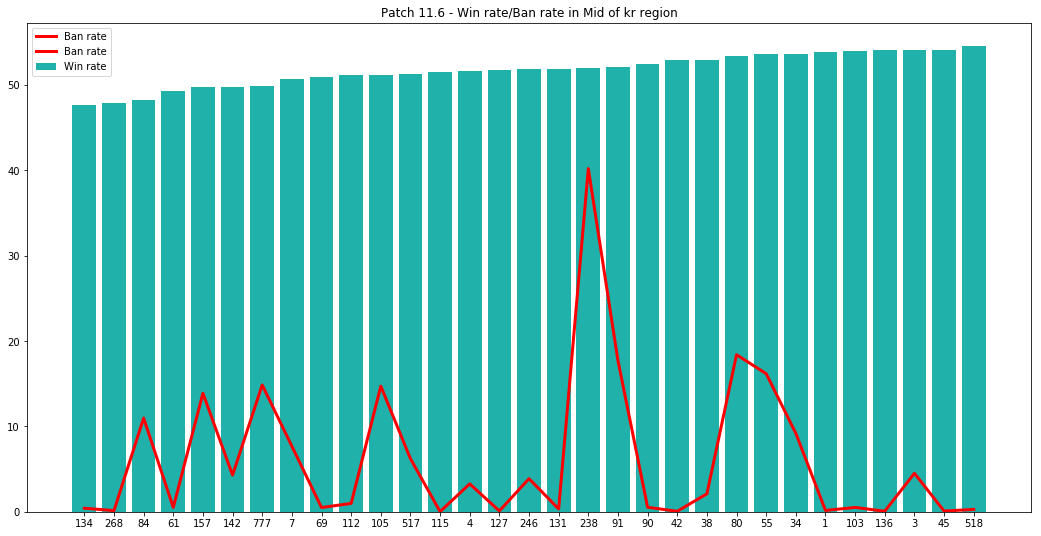

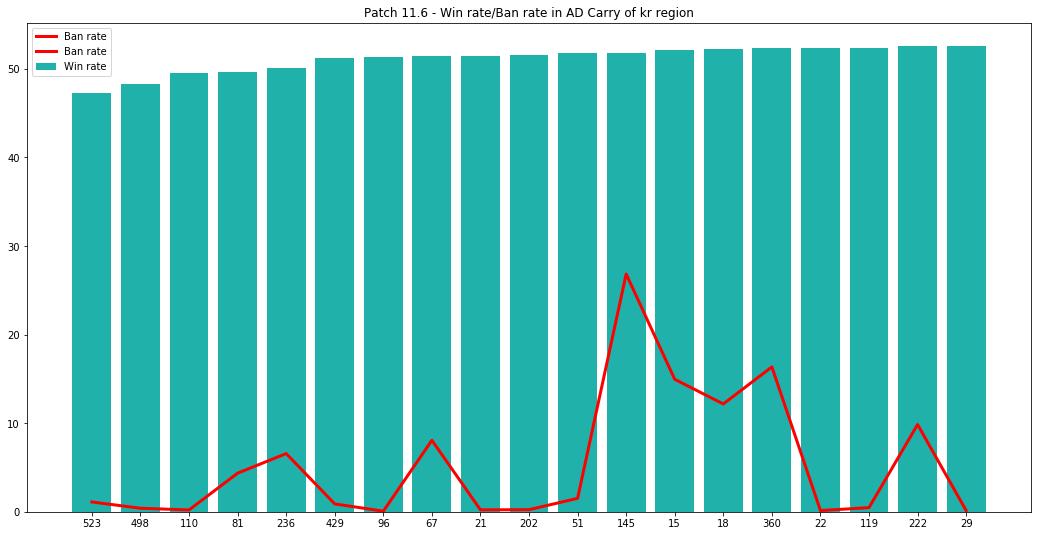

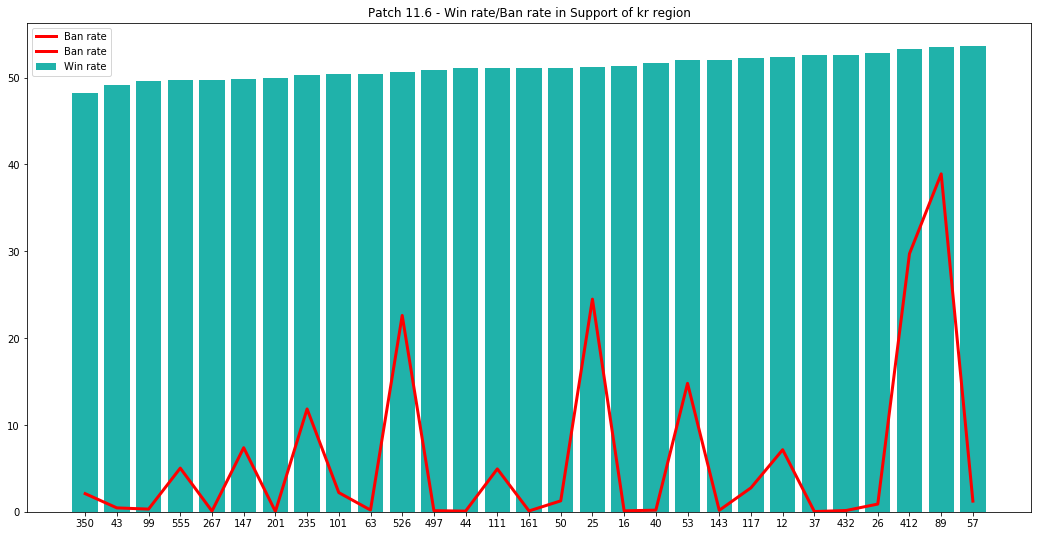

In [116]:
import requests;
import json;
from collections import Counter;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

def generate_table(dataset):
    output_table = {};
    output_table['rank'] = list(map(lambda x:x[list(x.keys())[0]]['rank'],dataset))
    output_table['lane'] = list(map(lambda x:x[list(x.keys())[0]]['lane'],dataset))
    output_table['tier'] = list(map(lambda x:x[list(x.keys())[0]]['tier'],dataset))
    output_table['win_games'] = list(map(lambda x:x[list(x.keys())[0]]['win_games'],dataset))
    output_table['games'] = list(map(lambda x:x[list(x.keys())[0]]['games'],dataset))
    output_table['overallWR'] = list(map(lambda x:x[list(x.keys())[0]]['overallWR'],dataset))
    output_table['lane_prior'] = list(map(lambda x:x[list(x.keys())[0]]['lane_prior'],dataset))
    output_table['ban_rate'] = list(map(lambda x:x[list(x.keys())[0]]['ban_rate'],dataset))
    
    pdTable = pd.DataFrame(output_table,index=list(map(lambda x:list(x.keys())[0],dataset)))
    return {
        'table': pdTable,
        'jsonTable': output_table
    }

def meta_analysis(patch,tier,region):
    url = f"https://apix1.op.lol/tierlist/7/?lane=default&patch={patch}&tier={tier}&queue=420&region={region}";
    r = requests.get(url);
    jsr = r.json();
    
    data = jsr["cid"];
    keys = list(data.keys());
    output_data = [];
    for i in data:
        line = {};
        row = data.get(i);
        line["rank"] = row[0];
        line["lane"] = row[1];
        line["tier"] = row[2];
        line["win_games"] = row[3];
        line["games"] = row[4];
        line["overallWR"] = round((row[3] / row[4]) * 100,2)
        line["lane_prior"] = round((row[4] / row[5]) * 100,2)
        line["ban_rate"] = row[6];
        r = {i: line};
        output_data.append(r);
    # print(output_data);
    
    ## Problem 1: Count tier champions {tier 1: 1, tier 2: 5,...} and put to histogram.
#     result = map(lambda x: x[list(x.keys())[0]]["tier"],output_data);
#     tier_frequency = dict(Counter(list(result)));
#     output_tier_frequency = dict(sorted(tier_frequency.items(),key=lambda x:x[0],reverse=True));

#     freq = list(map(lambda x: output_tier_frequency.get(x),output_tier_frequency));
#     label = list(map(lambda x: x, output_tier_frequency));
#     # label = ["D-","D","D+","C-","C","C+","B-","B","B+","A-","A","A+","S-","S","S+"];
#     pos = np.arange(len(label));

#     print(output_tier_frequency)
#     print(freq);
#     print(label);
#     print(pos);

#     ax = plt.axes()
#     ax.set_xticks(pos)
#     ax.set_xticklabels(label)
    
#     plt.bar(pos,freq,0.91);
#     plt.title(f"Patch {patch} - Power Rank Distribution");
#     plt.show();

    ## Problem 2: Tables 
#     print(generate_table(output_data))

    
    ## Problem 3: Visualize ban_rate over win_rate of each role.
    roles = ["Top","Jungle","Mid","AD Carry","Support"]
    for i,v in enumerate(roles):
        plt.figure(figsize=(18,9))
        filterOutputData = list(filter(lambda x:x[list(x.keys())[0]]['lane'] == i+1,output_data))
        filterOutputData.sort(key=lambda x:x[list(x.keys())[0]]['overallWR'])
#         print(f"{v}: {len(filterOutputData)}")
#         print(generate_table(filterOutputData)['table']);
        
        labels = list(map(lambda x:list(x.keys())[0],filterOutputData));
        plot_wr = generate_table(filterOutputData)['jsonTable']['overallWR']
        plot_br = generate_table(filterOutputData)['jsonTable']['ban_rate']
        pos = np.arange(len(labels))
        
        ax = plt.axes()
        ax.set_xticks(pos)
        ax.set_xticklabels(labels)
        
        
        plt.bar(pos,plot_wr,0.8,color="lightseagreen",label="Win rate");
        plt.plot(pos,plot_br,0.8,color="red", label="Ban rate", linewidth="3");
        ax.legend();
        plt.title(f"Patch {patch} - Win rate/Ban rate in {v} of {region} region");
        plt.show();
        
    
    
    

meta_analysis(11.6,"platinium_plus","kr");






In [33]:
roles = ["Top","Jungle","Mid","AD Carry","Support"]
for i,v in enumerate(roles):
    print(i+1,v);

1 Top
2 Jungle
3 Mid
4 AD Carry
5 Support


In [114]:
import pandas

mydataset = [
    {'432': {'rank': 2, 'lane': 5, 'tier': 2, 'win_games': 45676, 'games': 85887, 'overallWR': 53.18, 'laneWR': 99.41, 'ban_rate': 35.75}}, 
    {'526': {'rank': 7, 'lane': 5, 'tier': 4, 'win_games': 39826, 'games': 78326, 'overallWR': 50.85, 'laneWR': 99.75, 'ban_rate': 15.36}}
]


## Sample d = {'championId':['432','526'], 'rank': [2,7],...}
mydataset.sort(key=lambda x:x[list(x.keys())[0]]['ban_rate'])
print(mydataset)

[{'526': {'rank': 7, 'lane': 5, 'tier': 4, 'win_games': 39826, 'games': 78326, 'overallWR': 50.85, 'laneWR': 99.75, 'ban_rate': 15.36}}, {'432': {'rank': 2, 'lane': 5, 'tier': 2, 'win_games': 45676, 'games': 85887, 'overallWR': 53.18, 'laneWR': 99.41, 'ban_rate': 35.75}}]
